In [96]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy import coordinates
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astroquery.mast import Observations
from astropy import constants as const
from astropy import units as u
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Exercise A

In [97]:
red_ant = fits.open('red_antennae.fits')

In [98]:
red_ant.info()

Filename: red_antennae.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     569   (1055, 1075)   int16 (rescales to float32)   


In [99]:
red_ant[0].header['DATE']

'2005-08-11T21:34:10'

In [100]:
red_ant[0].data.shape

(1075, 1055)

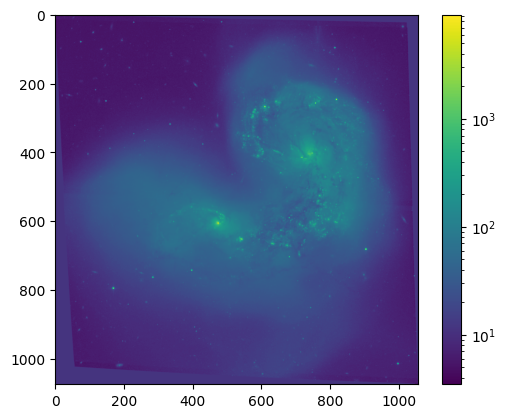

In [101]:
plt.imshow(red_ant[0].data, cmap='viridis', norm=LogNorm())
plt.colorbar()

In [102]:
brightest = np.unravel_index(np.argmax(red_ant[0].data), red_ant[0].data.shape)

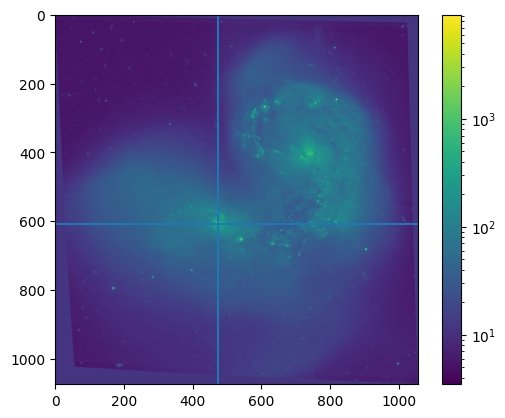

In [103]:
plt.imshow(red_ant[0].data, cmap='viridis', norm=LogNorm())
plt.colorbar()
plt.axhline(brightest[0])
plt.axvline(brightest[1])

(374.0, 574.0)

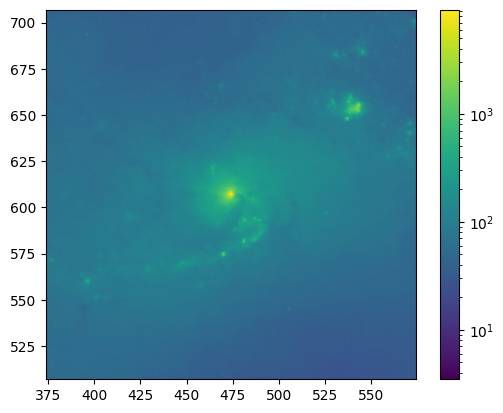

In [104]:
plt.imshow(red_ant[0].data, cmap='viridis', norm=LogNorm())
plt.colorbar()
plt.ylim([brightest[0]-100, brightest[0]+100])
plt.xlim([brightest[1]-100, brightest[1]+100])

# Exercise 2

In [105]:
m51_optical = fits.open('m51_optical_R.fits')

In [106]:
m51_optical.info()

Filename: m51_optical_R.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (2384, 3600)   int16 (rescales to uint16)   


In [107]:
m51_data = m51_optical[0].data

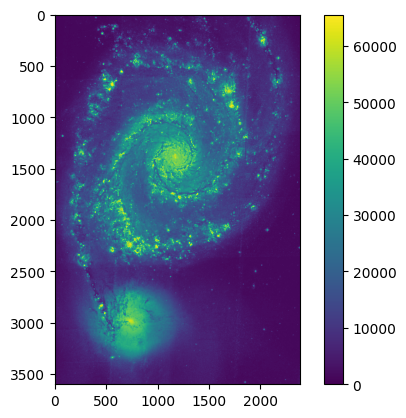

In [108]:
plt.imshow(m51_data, cmap='viridis')
plt.colorbar()

In [109]:
m51_wcs = WCS(m51_optical[0].header)

invalid keyvalue. [astropy.wcs.wcs]


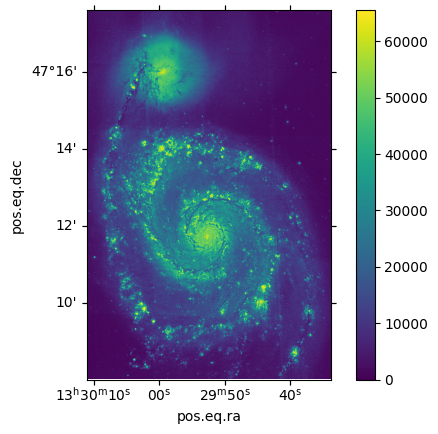

In [110]:
fig = plt.figure()

ax = plt.subplot(projection=m51_wcs)
img = ax.imshow(m51_data, cmap='viridis')
fig.colorbar(img, ax=ax)

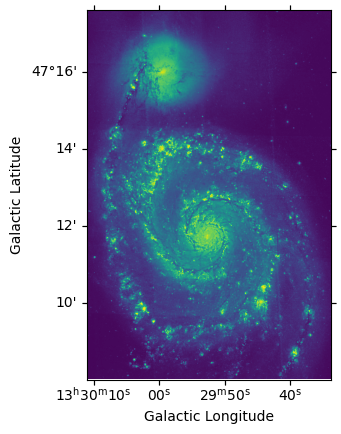

In [111]:
plt.subplot(projection=m51_wcs)
plt.imshow(m51_data, origin='lower')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

In [112]:
c = coordinates.SkyCoord("13h29m52.7s 47d11m43s", frame='icrs')

r = 3 * u.arcminute

sources = SDSS.query_region(c, radius = r)

In [113]:
sources

ra,dec,objid,run,rerun,camcol,field
float64,float64,uint64,int64,int64,int64,int64
202.412233226547,47.2233023562291,1237661362908561420,3699,301,6,100
202.417022970856,47.2158057581682,1237661362908561473,3699,301,6,100
202.447564160515,47.227078435589,1237661362908561433,3699,301,6,100
202.446536236938,47.2272157863314,1237661362908561467,3699,301,6,100
202.446445486631,47.2272187832606,1237661362908561430,3699,301,6,100
202.446137265374,47.2278938796485,1237661362908561432,3699,301,6,100
202.418918671018,47.1974803439359,1237661362908561477,3699,301,6,100
202.423565762729,47.1979135351773,1237661362908561423,3699,301,6,100
202.423570475396,47.1979195927486,1237661362908561450,3699,301,6,100


In [114]:
source_coords = SkyCoord(sources['ra'], sources['dec'], unit="deg")
source_pixels = source_coords.to_pixel(m51_wcs)

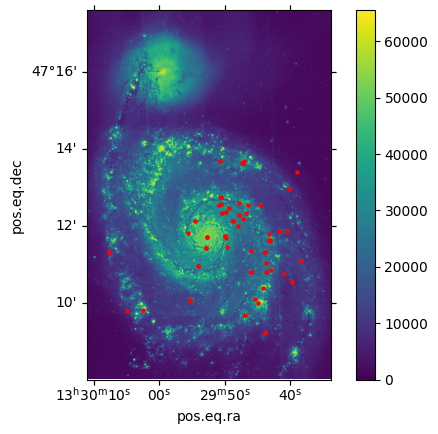

In [115]:
fig = plt.figure()

ax = plt.subplot(projection=m51_wcs)
img = ax.imshow(m51_data, cmap='viridis')
fig.colorbar(img, ax=ax)

plt.scatter(source_pixels[0], source_pixels[1], s=5, color='red')


In [146]:
mast_obs = Observations.query_region(c, radius=r)

mast_coords = SkyCoord(mast_obs['s_ra'], mast_obs['s_dec'], unit="deg")
mast_pixels = mast_coords.to_pixel(m51_wcs)

(0.0, 3600.0)

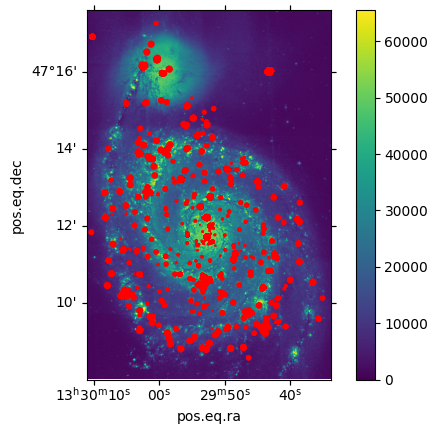

In [151]:
fig = plt.figure()

ax = plt.subplot(projection=m51_wcs)
img = ax.imshow(m51_data, cmap='viridis')
fig.colorbar(img, ax=ax)

plt.scatter(mast_pixels[0], mast_pixels[1], color='red', s=mast_obs['distance']/10)
plt.xlim([0, len(m51_data[0])])
plt.ylim([0, len(m51_data[:,0])])

# Exercise C

In [118]:
hr_data = np.loadtxt('my_data_file.dat')

In [119]:
masses = hr_data[:,0] * const.M_sun
temp = hr_data[:,1] * u.K
g = 10**hr_data[:,2] * u.cm * u.s**-2
g = g.to(u.m / u.s**2)

In [120]:
radii = np.sqrt(const.G * masses / g)

In [121]:
solar_luminosity = u.def_unit('L_sun', u.W * const.L_sun.value, format={'latex': r'L_\odot'})


In [122]:
def get_luminosity(radius, temperature):
    L = 4 * np.pi * radius**2 * const.sigma_sb * temperature**4
    L = L.to(solar_luminosity)
    return L

In [123]:

luminosities = get_luminosity(radii, temp)


In [124]:
luminosities

<Quantity [1.20414521e-04, 2.53545130e-04, 5.55127149e-04, 8.71079269e-04,
           1.20079605e-03, 1.90496242e-03, 2.71206017e-03, 3.85395582e-03,
           5.14295799e-03, 8.20075961e-03, 1.17245229e-02, 1.55113139e-02,
           2.01584800e-02, 2.68172944e-02, 3.62832444e-02, 5.73369774e-02,
           7.30657316e-02, 1.54368553e-01, 3.41060874e-01, 8.72343877e-01,
           1.30689243e+00] L_sun>

Text(0.5, 1.0, 'Hertzsprung-Russell diagram of the stars given')

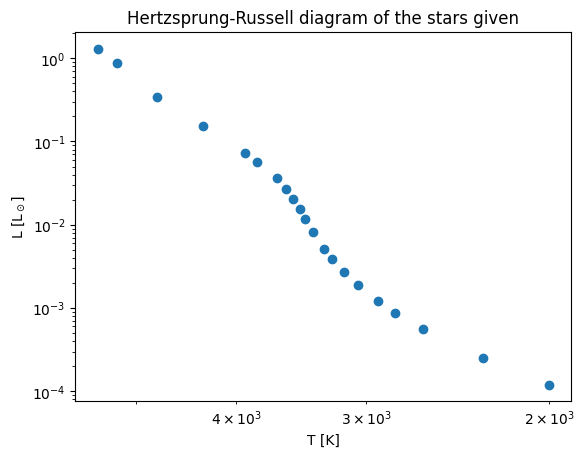

In [125]:
plt.scatter(temp, luminosities)
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('T [K]')
plt.ylabel(r'L [L$_\odot$]')
plt.title('Hertzsprung-Russell diagram of the stars given')